In [1]:
import ct_utilities as ctu
import pandas as pd
import numpy as np
import nglview as nv
import parmed as pmd
import MDAnalysis as mda
import seaborn as sns

# Visual inspection

In [8]:
l='malato'
amb = pmd.load_file(f'SLC25A1+ligandi/SLC25A1+{l}/{l}_input.parm7', f'SLC25A1+ligandi/SLC25A1+{l}/{l}_input.rst7')

In [9]:
u = mda.Universe(amb)

In [10]:
lig = u.select_atoms('resid 298')
nv.show_mdanalysis(lig)

NGLWidget()

# Create inputs

In [4]:
ligandi = ['citrato', 'isocitrato', 'malato']
ligname = ['CIT', 'ISO', 'MAL']
i=0
for l in ligandi:
    parm7 = f"/mnt/Storage1/massimo/SLC25A1+ligandi/SLC25A1+{l}/{l}_input.parm7"
    TRAJ_OUTPUT = f"/mnt/Storage1/massimo/SLC25A1+ligandi/SLC25A1+{l}"
    
#     intrahb = ctu.input_intrahb(parm7, TRAJ_OUTPUT, 298)
#     with open(f'{TRAJ_OUTPUT}/cpp_analysis/intrahbonds/intrahbonds.in', 'w') as fo:
#         fo.write(intrahb)
        
#     intrasb = ctu.input_intrasb(parm7, TRAJ_OUTPUT, 298)
#     with open(f'{TRAJ_OUTPUT}/cpp_analysis/intrasaltbridges/intrasaltbridges.in', 'w') as fo:
#         fo.write(intrasb)
    
    intrahp = ctu.input_intrahp(parm7, TRAJ_OUTPUT, 298)
    with open(f'{TRAJ_OUTPUT}/cpp_analysis/intrahydrophobics/intrahydrophobics.in', 'w') as fo:
        fo.write(intrahp)
    
#     lig_hb = ctu.input_lighb(parm7, TRAJ_OUTPUT, 298, ligname[i])
#     with open(f'{TRAJ_OUTPUT}/cpp_analysis/lig_hbonds/lig_hbonds.in', 'w') as fo:
#         fo.write(lig_hb)
        
#     lig_sb = ctu.input_ligsb(parm7, TRAJ_OUTPUT, 298, ligA=':299@O1,O3,O9,O10,O12,O13')
#     with open(f'{TRAJ_OUTPUT}/cpp_analysis/lig_saltbridges/lig_saltbridges.in', 'w') as fo:
#         fo.write(lig_sb)
        
    lig_hp = ctu.input_lighp(parm7, TRAJ_OUTPUT, 298, ligname[i])
    with open(f'{TRAJ_OUTPUT}/cpp_analysis/lig_hydrophobics/lig_hydrophobics.in', 'w') as fo:
        fo.write(lig_hp)
#     print(ligname[i], l)
    i+=1

In [11]:
# l = 'citrato'
# l = 'isocitrato'
l = 'malato'

parm7 = f"/mnt/Storage1/massimo/SLC25A1+ligandi/SLC25A1+{l}/{l}_input.parm7"
TRAJ_OUTPUT = f"/mnt/Storage1/massimo/SLC25A1+ligandi/SLC25A1+{l}"

lig_sb = ctu.input_ligsb(parm7, TRAJ_OUTPUT, 298, ligA=':299@O1,O3,O9,O10')
with open(f'{TRAJ_OUTPUT}/cpp_analysis/lig_saltbridges/lig_saltbridges.in', 'w') as fo:
    fo.write(lig_sb)

# Analyses

## SLC25A1_apo

In [2]:
apo_path = '/mnt/Storage1/massimo/SLC25A1/cpp_analysis'

### Intraprotein Hbonds

In [28]:
apo_hb = ctu.hbonds(f'{apo_path}/intrahbonds/avghb.dat',frac=0.2)
apo_hb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
19,GLN_41@OE1,THR_233@HG1,THR_233@OG1,14893,0.7447,2.7426,162.4034
65,ASP_248@OD2,ARG_244@HH11,ARG_244@NH1,12451,0.6226,2.7981,165.3532
76,ASP_229@OD1,ARG_269@HE,ARG_269@NE,11593,0.5796,2.8219,158.7415
84,ASP_248@OD1,ARG_244@HE,ARG_244@NE,11005,0.5503,2.8361,167.1579
135,ASP_140@OD2,THR_142@HG1,THR_142@OG1,9207,0.4603,2.6614,165.4057
136,GLU_122@OE1,ARG_88@HH11,ARG_88@NH1,9206,0.4603,2.8103,161.0239
139,ASN_225@OD1,SER_180@HG1,SER_180@OG,9021,0.4511,2.7465,157.0257
143,GLU_34@OE2,ARG_272@HH22,ARG_272@NH2,8879,0.4440,2.8164,160.2570
146,GLU_257@OE1,ARG_234@HH12,ARG_234@NH1,8834,0.4417,2.8070,162.4329
149,GLU_122@OE2,ARG_88@HE,ARG_88@NE,8790,0.4395,2.8055,164.7584


### Intraprotein SaltBridges

In [29]:
apo_sb = ctu.salt_bridges(f'{apo_path}/intrasaltbridges/avg_sb.dat')
apo_sb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,GLU_122@OE1,ARG_88@HH11,ARG_88@NH1,19040,0.9520,3.0816,149.0742
1,GLU_122@OE1,ARG_88@HH12,ARG_88@NH1,19040,0.9520,3.0816,37.1853
2,GLU_122@OE2,ARG_88@HH11,ARG_88@NH1,19003,0.9502,3.1052,147.6566
3,GLU_122@OE2,ARG_88@HH12,ARG_88@NH1,19003,0.9502,3.1052,36.5219
4,GLU_131@OE2,LYS_134@HZ1,LYS_134@NZ,17556,0.8778,2.8790,80.2165
...,...,...,...,...,...,...,...
130,GLU_157@OE2,ARG_160@HH11,ARG_160@NH1,4312,0.2156,3.1479,131.0955
131,GLU_34@OE2,ARG_272@HH12,ARG_272@NH1,4238,0.2119,3.0785,30.8093
132,GLU_34@OE2,ARG_272@HH11,ARG_272@NH1,4238,0.2119,3.0785,143.7047
133,ASP_56@OD1,ARG_59@HH12,ARG_59@NH1,4091,0.2046,3.0772,55.7145


### Intraprotein Hydrophobics

In [3]:
apo_hp = ctu.contacts(f'{apo_path}/intrahydrophobics/contacts.dat')
apo_hp

,Contact,Nframes,Frac,Avg,Stdev
1219,:128@CB_:129@CD,20000.0,1.000,3.45,0.127
1426,:35@CD2_:39@CG,20000.0,1.000,4.26,0.338
1420,:227@CG_:263@CE2,20000.0,1.000,4.23,0.389
1421,:227@CD_:263@CZ,20000.0,1.000,4.23,0.408
1422,:38@CG2_:233@CG2,20000.0,1.000,4.24,0.347
...,...,...,...,...,...
1691,:45@CZ_:140@CG,5062.0,0.253,4.19,0.593
1692,:141@CD_:146@CB,5017.0,0.251,4.45,0.413
1693,:141@CB_:146@CB,4989.0,0.249,4.42,0.524
1694,:141@CG_:146@CB,4977.0,0.249,4.47,0.499


---

## SLC25A1-CIT

In [24]:
cit_path = '/mnt/Storage1/massimo/SLC25A1+ligandi/SLC25A1+citrato/cpp_analysis'

### Intraprotein Hbonds

In [32]:
cit_intrahb = ctu.hbonds(f'{cit_path}/intrahbonds/avghb.dat',frac=0.2)
cit_intrahb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
6,ASP_248@OD2,ARG_244@HH11,ARG_244@NH1,16987,0.8494,2.7731,166.4574
89,GLN_41@OE1,THR_233@HG1,THR_233@OG1,11431,0.5716,2.7578,162.1169
90,ASP_248@OD1,ARG_244@HE,ARG_244@NE,11424,0.5712,2.8503,167.0322
119,GLU_161@OE1,TYR_148@HH,TYR_148@OH,9946,0.4973,2.6775,159.7050
120,GLU_122@OE2,ARG_88@HE,ARG_88@NE,9802,0.4901,2.8147,162.5036
122,GLU_122@OE1,ARG_88@HH12,ARG_88@NH1,9699,0.4849,2.8122,159.0694
133,GLU_34@OE1,ARG_272@HH21,ARG_272@NH2,9192,0.4596,2.8261,163.2664
138,HSE_65@ND1,ARG_72@HH22,ARG_72@NH2,8968,0.4484,2.8819,158.4040
142,ASN_225@OD1,SER_180@HG1,SER_180@OG,8860,0.4430,2.7558,158.9710
151,GLU_257@OE2,ARG_234@HH22,ARG_234@NH2,8424,0.4212,2.7911,161.5010


### Intraprot SaltBridges

In [33]:
cit_intrasb = ctu.salt_bridges(f'{cit_path}/intrasaltbridges/avg_sb.dat',frac=0.2)
cit_intrasb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,ASP_229@OD1,LYS_177@HZ2,LYS_177@NZ,19996,0.9998,2.7953,75.2909
1,ASP_229@OD1,LYS_177@HZ3,LYS_177@NZ,19996,0.9998,2.7953,89.8856
2,ASP_229@OD1,LYS_177@HZ1,LYS_177@NZ,19996,0.9998,2.7953,89.4549
3,GLU_34@OE2,LYS_37@HZ1,LYS_37@NZ,19734,0.9867,2.8857,82.5047
4,GLU_34@OE2,LYS_37@HZ3,LYS_37@NZ,19734,0.9867,2.8857,89.0033
...,...,...,...,...,...,...,...
137,GLU_131@OE2,LYS_134@HZ1,LYS_134@NZ,4636,0.2318,2.8989,88.5924
138,GLU_44@OE2,ARG_50@HH12,ARG_50@NH1,4506,0.2253,3.2166,53.8892
139,GLU_44@OE2,ARG_50@HH11,ARG_50@NH1,4506,0.2253,3.2166,129.9495
140,GLU_44@OE1,ARG_50@HH12,ARG_50@NH1,4473,0.2236,3.2405,51.7825


### Intraprot Hydrophobics

In [5]:
cit_intrahp = ctu.contacts(f'{cit_path}/intrahydrophobics/contacts.dat',frac=0.2)
cit_intrahp

,Contact,Nframes,Frac,Avg,Stdev
1219,:82@CB_:83@CD,20000.0,1.000,3.45,0.115
1450,:38@CG2_:135@CG1,20000.0,1.000,4.32,0.364
1439,:61@CG2_:70@CG,20000.0,1.000,4.29,0.428
1440,:91@CB_:118@CB,20000.0,1.000,4.29,0.283
1441,:41@CB_:233@CB,20000.0,1.000,4.29,0.264
...,...,...,...,...,...
1688,:223@CZ_:270@CD1,7695.0,0.385,4.33,0.613
1698,:136@CE_:239@CD,5792.0,0.290,4.26,0.913
1699,:12@CB_:89@CE2,4394.0,0.220,4.09,0.422
1700,:89@CZ_:93@CG,4375.0,0.219,4.14,0.436


### Ligand Hbonds

In [35]:
cit_hb = ctu.hbonds_lig(f'{cit_path}/lig_hbonds/avg_CIThb.dat', 'CIT', frac=0.2)
cit_hb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,CIT_299@O1,ARG_272@HH22,ARG_272@NH2,7699,0.3850,2.7339,159.9811
1,CIT_299@O3,ARG_269@HH12,ARG_269@NH1,7650,0.3825,2.7277,160.2749
2,CIT_299@O1,ARG_272@HH12,ARG_272@NH1,7550,0.3775,2.7568,159.6690
3,CIT_299@O3,ARG_269@HH11,ARG_269@NH1,7078,0.3539,2.7402,159.2264
4,CIT_299@O3,LYS_177@HZ2,LYS_177@NZ,6287,0.3144,2.7113,160.1502
5,CIT_299@O1,ARG_269@HH21,ARG_269@NH2,4790,0.2395,2.7224,162.2313
6,CIT_299@O3,LYS_177@HZ1,LYS_177@NZ,4012,0.2006,2.7059,159.8229


### Ligand SaltBridges

In [36]:
cit_sb = ctu.salt_bridges(f'{cit_path}/lig_hbonds/avg_CIThb.dat', frac=0.2)
cit_sb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,CIT_299@O1,ARG_272@HH22,ARG_272@NH2,7699,0.3850,2.7339,159.9811
1,CIT_299@O3,ARG_269@HH12,ARG_269@NH1,7650,0.3825,2.7277,160.2749
2,CIT_299@O1,ARG_272@HH12,ARG_272@NH1,7550,0.3775,2.7568,159.6690
3,CIT_299@O3,ARG_269@HH11,ARG_269@NH1,7078,0.3539,2.7402,159.2264
4,CIT_299@O3,LYS_177@HZ2,LYS_177@NZ,6287,0.3144,2.7113,160.1502
5,CIT_299@O1,ARG_269@HH21,ARG_269@NH2,4790,0.2395,2.7224,162.2313
6,CIT_299@O3,LYS_177@HZ1,LYS_177@NZ,4012,0.2006,2.7059,159.8229


### Ligand Hydrophobics

In [25]:
cit_hp = ctu.contacts(f'{cit_path}/lig_hydrophobics/contacts.dat', frac=0.2)
cit_hp

,Contact,Nframes,Frac,Avg,Stdev
0,:299@C2_:269@CZ,20000.0,1.000,4.20,0.366
1,:299@C2_:177@CE,19989.0,0.999,4.31,0.638
2,:299@C4_:177@CE,19935.0,0.997,4.40,0.565


---

## SLC25A1-ISO

In [54]:
iso_path = '/mnt/Storage1/massimo/SLC25A1+ligandi/SLC25A1+isocitrato/cpp_analysis'

### Intraprotein Hbonds

In [39]:
iso_intrahb = ctu.hbonds(f'{iso_path}/intrahbonds/avghb.dat',frac=0.2)
iso_intrahb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
1,ASP_140@OD1,THR_142@HG1,THR_142@OG1,18252,0.9126,2.6685,165.6105
8,ASP_229@OD1,ARG_269@HE,ARG_269@NE,16950,0.8475,2.8094,160.4919
87,ASN_225@OD1,SER_180@HG1,SER_180@OG,11148,0.5574,2.7663,160.8604
104,GLN_41@OE1,THR_233@HG1,THR_233@OG1,10330,0.5165,2.7428,159.4905
115,GLU_122@OE2,ARG_88@HH11,ARG_88@NH1,9878,0.4939,2.8359,155.6340
125,ASP_248@OD2,ARG_244@HH11,ARG_244@NH1,9553,0.4777,2.7918,165.1379
134,GLU_122@OE1,ARG_88@HH11,ARG_88@NH1,9233,0.4617,2.8342,153.7240
140,GLU_122@OE2,ARG_88@HE,ARG_88@NE,8990,0.4495,2.8242,159.8816
144,GLU_34@OE1,ARG_272@HH21,ARG_272@NH2,8656,0.4328,2.8104,159.0304
151,ASP_248@OD1,ARG_244@HE,ARG_244@NE,8139,0.4069,2.8355,166.4238


### Intraprot SaltBridges

In [40]:
iso_intrasb = ctu.salt_bridges(f'{iso_path}/intrasaltbridges/avg_sb.dat',frac=0.2)
iso_intrasb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,ASP_229@OD1,ARG_269@HE,ARG_269@NE,19999,1.0000,2.8596,158.6963
1,ASP_229@OD1,ARG_269@HH12,ARG_269@NH1,19997,0.9999,3.0696,26.4638
2,ASP_229@OD1,ARG_269@HH11,ARG_269@NH1,19997,0.9999,3.0696,140.8601
3,ASP_229@OD1,LYS_37@HZ2,LYS_37@NZ,19914,0.9957,2.7491,84.2105
4,ASP_229@OD1,LYS_37@HZ3,LYS_37@NZ,19914,0.9957,2.7491,85.3922
...,...,...,...,...,...,...,...
119,GLU_34@OE1,ARG_272@HE,ARG_272@NE,4300,0.2150,3.8661,11.0003
120,ASP_229@OD2,ARG_269@HE,ARG_269@NE,4252,0.2126,3.8379,130.1206
121,ASP_43@OD1,ARG_52@HH22,ARG_52@NH2,4110,0.2055,3.0829,68.1936
122,ASP_43@OD1,ARG_52@HH21,ARG_52@NH2,4110,0.2055,3.0829,132.8966


### Intraprot Hydrophobics

In [8]:
iso_intrahp = ctu.contacts(f'{iso_path}/intrahydrophobics/contacts.dat',frac=0.2)
iso_intrahp

,Contact,Nframes,Frac,Avg,Stdev
1218,:267@CB_:268@CD,20000.0,1.000,3.45,0.118
1422,:37@CG_:41@CG,20000.0,1.000,4.29,0.307
1416,:227@CG_:262@CB,20000.0,1.000,4.27,0.316
1417,:36@CG1_:268@CG,20000.0,1.000,4.27,0.385
1418,:41@CG_:264@CB,20000.0,1.000,4.27,0.340
...,...,...,...,...,...
1657,:138@CG2_:139@CD2,13846.0,0.692,4.40,0.587
1658,:295@CE2_:296@CD,12339.0,0.617,4.45,0.908
1649,:156@CD_:160@CZ,11785.0,0.589,4.49,0.997
1659,:295@CZ2_:296@CD,11395.0,0.570,4.28,0.767


### Ligand Hbonds

In [42]:
iso_hb = ctu.hbonds_lig(f'{iso_path}/lig_hbonds/avg_ISOhb.dat', 'ISO', frac=0.2)
iso_hb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,ISO_299@O14,ARG_269@HH12,ARG_269@NH1,14123,0.7062,2.7445,157.0815
1,ISO_299@O14,ARG_269@HH21,ARG_269@NH2,11659,0.5829,2.7522,156.1039
2,ISO_299@O8,GLN_178@HE21,GLN_178@NE2,8920,0.4460,2.8188,162.2429
3,ISO_299@O1,ARG_88@HH12,ARG_88@NH1,8326,0.4163,2.7355,159.0178
4,ISO_299@O3,ARG_88@HH12,ARG_88@NH1,7103,0.3552,2.7571,156.3830
5,ISO_299@O14,LYS_177@HZ2,LYS_177@NZ,5296,0.2648,2.6997,159.2595
6,ISO_299@O14,LYS_177@HZ1,LYS_177@NZ,4858,0.2429,2.6961,158.7153
7,ISO_299@O14,LYS_177@HZ3,LYS_177@NZ,4405,0.2203,2.6982,158.6778
8,ISO_299@O3,ARG_185@HH22,ARG_185@NH2,4172,0.2086,2.7326,160.2480


### Ligand SaltBridges

In [6]:
iso_sb = ctu.lig_saltbridges(f'{iso_path}/lig_saltbridges/avg_ISOsb1.dat', f'{iso_path}/lig_saltbridges/avg_ISOsb2.dat')
iso_sb

,#Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,ISO_299@O14,ARG_269@HH12,ARG_269@NH1,19430,0.9715,2.8840,150.4115
1,ISO_299@O14,ARG_269@HH11,ARG_269@NH1,19430,0.9715,2.8840,35.7472
2,ISO_299@O14,LYS_177@HZ2,LYS_177@NZ,18728,0.9364,2.8140,91.6273
3,ISO_299@O14,LYS_177@HZ3,LYS_177@NZ,18728,0.9364,2.8140,85.5442
4,ISO_299@O14,LYS_177@HZ1,LYS_177@NZ,18728,0.9364,2.8140,87.7944
...,...,...,...,...,...,...,...
148,ISO_299@O15,LYS_37@HZ3,LYS_37@NZ,3,0.0001,3.8747,118.7323
149,ISO_299@O15,LYS_37@HZ2,LYS_37@NZ,3,0.0001,3.8747,72.1510
150,ISO_299@O15,LYS_37@HZ1,LYS_37@NZ,3,0.0001,3.8747,76.6202
151,ISO_299@O1,ARG_272@HE,ARG_272@NE,3,0.0001,3.6825,125.4288


### Ligand Hydrophobics

In [44]:
iso_hp = ctu.contacts(f'{iso_path}/lig_hydrophobics/ISO_hpcontacts.dat', frac=0.2)
iso_hp

,Contact,Nframes,Frac,Avg,Stdev
0,:299@C10_:272@CZ,20000.0,1.000,4.11,0.334
1,:299@C13_:177@CE,20000.0,1.000,4.30,0.275
4,:299@C13_:272@CZ,19999.0,1.000,4.48,0.500
5,:299@C7_:177@CE,19998.0,1.000,4.41,0.576
96,:299@C13_:269@CZ,19969.0,0.998,4.21,0.399
13,:299@C2_:88@CZ,19608.0,0.980,4.47,0.644


---

## SLC25A1-MAL

In [9]:
mal_path = '/mnt/Storage1/massimo/SLC25A1+ligandi/SLC25A1+malato/cpp_analysis'

### Intraprotein Hbonds

In [46]:
mal_intrahb = ctu.hbonds(f'{mal_path}/intrahbonds/avghb.dat',frac=0.2)
mal_intrahb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
14,GLN_41@OE1,THR_233@HG1,THR_233@OG1,15728,0.7864,2.7164,162.1004
29,GLU_122@OE1,ARG_88@HE,ARG_88@NE,14575,0.7288,2.7897,166.4750
31,ASN_225@OD1,SER_180@HG1,SER_180@OG,14453,0.7227,2.7441,159.5711
42,GLU_122@OE2,ARG_88@HH12,ARG_88@NH1,13821,0.6911,2.8057,163.1895
86,ASP_140@OD1,THR_142@HG1,THR_142@OG1,11858,0.5929,2.6661,165.3156
97,SER_221@OG,ARG_269@HH22,ARG_269@NH2,11319,0.5659,2.8555,148.7863
114,GLN_103@OE1,ARG_110@HH21,ARG_110@NH2,10240,0.5120,2.7575,161.5427
119,ASP_229@OD1,ARG_269@HH11,ARG_269@NH1,10052,0.5026,2.8047,158.2687
163,ASP_140@OD2,THR_142@HG1,THR_142@OG1,7608,0.3804,2.6656,164.9462
173,GLN_236@OE1,LYS_232@HZ1,LYS_232@NZ,7220,0.3610,2.7702,160.1672


### Intraprot SaltBridges

In [47]:
mal_intrasb = ctu.salt_bridges(f'{mal_path}/intrasaltbridges/avg_sb.dat',frac=0.2)
mal_intrasb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,ASP_229@OD1,LYS_37@HZ3,LYS_37@NZ,19998,0.9999,2.8395,95.2564
1,ASP_229@OD1,LYS_37@HZ1,LYS_37@NZ,19998,0.9999,2.8395,87.0797
2,ASP_229@OD1,LYS_37@HZ2,LYS_37@NZ,19998,0.9999,2.8395,78.5716
3,ASP_229@OD2,LYS_37@HZ3,LYS_37@NZ,19919,0.9960,3.0230,92.7340
4,ASP_229@OD2,LYS_37@HZ2,LYS_37@NZ,19919,0.9960,3.0230,84.3702
...,...,...,...,...,...,...,...
127,ASP_276@OD1,ARG_272@HH21,ARG_272@NH2,4371,0.2185,3.5935,96.0596
128,ASP_276@OD1,ARG_272@HH22,ARG_272@NH2,4371,0.2185,3.5935,106.2390
129,GLU_34@OE1,LYS_37@HZ1,LYS_37@NZ,4050,0.2025,3.7000,75.4786
130,GLU_34@OE1,LYS_37@HZ2,LYS_37@NZ,4050,0.2025,3.7000,66.8407


### Intraprot Hydrophobics

In [10]:
mal_intrahp = ctu.contacts(f'{mal_path}/intrahydrophobics/contacts.dat',frac=0.2)
mal_intrahp

,Contact,Nframes,Frac,Avg,Stdev
1217,:82@CB_:83@CD,20000.0,1.000,3.47,0.114
1426,:61@CG2_:70@CG,20000.0,1.000,4.28,0.381
1428,:41@CD_:229@CG,20000.0,1.000,4.29,0.299
1429,:38@CG2_:233@CG2,20000.0,1.000,4.30,0.391
1430,:33@CB_:272@CB,20000.0,1.000,4.31,0.317
...,...,...,...,...,...
1695,:151@CD2_:152@CZ,6402.0,0.320,4.37,0.796
1696,:99@CE_:113@CD2,5362.0,0.268,4.33,0.666
1697,:205@CE_:213@CG,4046.0,0.202,4.34,0.568
1698,:205@CE_:213@CD2,4003.0,0.200,4.18,0.660


### Ligand Hbonds

In [51]:
mal_hb = ctu.hbonds_lig(f'{mal_path}/lig_hbonds/avg_MALhb.dat', 'MAL', frac=0.2)
mal_hb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,MAL_299@O9,ARG_269@HH12,ARG_269@NH1,10751,0.5375,2.7082,163.0704
1,MAL_299@O10,ARG_269@HH21,ARG_269@NH2,9207,0.4603,2.7430,161.1888
2,MAL_299@O9,ARG_269@HH21,ARG_269@NH2,7533,0.3766,2.7274,161.8581
3,MAL_299@O10,ARG_269@HH12,ARG_269@NH1,7305,0.3653,2.7164,164.9805
4,MAL_299@O9,LYS_177@HZ2,LYS_177@NZ,4938,0.2469,2.7030,160.1506


### Ligand SaltBridges

In [43]:
mal_sb = ctu.salt_bridges(f'{mal_path}/lig_hbonds/avg_MALsb.dat', frac=0.2)
mal_sb

,Acceptor,DonorH,Donor,Frames,Frac,AvgDist,AvgAng
0,ISO_299@O14,ARG_269@HH12,ARG_269@NH1,14123,0.7062,2.7445,157.0815
1,ISO_299@O14,ARG_269@HH21,ARG_269@NH2,11659,0.5829,2.7522,156.1039
2,ISO_299@O8,GLN_178@HE21,GLN_178@NE2,8920,0.4460,2.8188,162.2429
3,ISO_299@O1,ARG_88@HH12,ARG_88@NH1,8326,0.4163,2.7355,159.0178
4,ISO_299@O3,ARG_88@HH12,ARG_88@NH1,7103,0.3552,2.7571,156.3830
5,ISO_299@O14,LYS_177@HZ2,LYS_177@NZ,5296,0.2648,2.6997,159.2595
6,ISO_299@O14,LYS_177@HZ1,LYS_177@NZ,4858,0.2429,2.6961,158.7153
7,ISO_299@O14,LYS_177@HZ3,LYS_177@NZ,4405,0.2203,2.6982,158.6778
8,ISO_299@O3,ARG_185@HH22,ARG_185@NH2,4172,0.2086,2.7326,160.2480


### Ligand Hydrophobics

In [44]:
iso_hp = ctu.contacts(f'{iso_path}/lig_hydrophobics/ISO_hpcontacts.dat', frac=0.2)
iso_hp

,Contact,Nframes,Frac,Avg,Stdev
0,:299@C10_:272@CZ,20000.0,1.000,4.11,0.334
1,:299@C13_:177@CE,20000.0,1.000,4.30,0.275
4,:299@C13_:272@CZ,19999.0,1.000,4.48,0.500
5,:299@C7_:177@CE,19998.0,1.000,4.41,0.576
96,:299@C13_:269@CZ,19969.0,0.998,4.21,0.399
13,:299@C2_:88@CZ,19608.0,0.980,4.47,0.644


---

# Plot TimeSeries

## SLC25A1-CIT

In [7]:
import pandas as pd
dfhb1 =pd.read_csv("SLC25A1+ligandi/SLC25A1+citrato/cpp_analysis/lig_hbonds/CIThb_series.dat", delim_whitespace=True)
dfhb1

,#Frame,CIT_299@O3-LYS_177@NZ-HZ1,CIT_299@O1-ARG_269@NE-HE,CIT_299@O1-ARG_269@NH1-HH11,CIT_299@O12-ARG_272@NH1-HH12,CIT_299@O13-ARG_272@NH1-HH12,CIT_299@O10-ARG_88@NH1-HH11,CIT_299@O10-GLN_178@NE2-HE22,CIT_299@O1-ARG_272@NH2-HH22,CIT_299@O9-ARG_88@NH1-HH11,...,CIT_299@O13-LYS_134@NZ-HZ1,CIT_299@O13-LYS_84@NZ-HZ2,CIT_299@O13-LYS_84@NZ-HZ3,CIT_299@O13-LYS_84@NZ-HZ1,CIT_299@O9-ARG_272@NH1-HH11,CIT_299@O10-ARG_272@NH2-HH22,CIT_299@O1-LYS_134@NZ-HZ3,CIT_299@O1-LYS_134@NZ-HZ1,CIT_299@O1-LYS_134@NZ-HZ2,CIT_299@O12-LYS_134@NZ-HZ3
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19996,19997,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
19997,19998,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
19998,19999,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [8]:
import time

start = time.time()
df_cathb = ctu.df_4catplot(dfhb1, 'CIT_299', 'HBond')
end = time.time()
print(end - start)

145.77493476867676


In [9]:
dfsb1 = ctu.dfseries_sb("SLC25A1+ligandi/SLC25A1+citrato/cpp_analysis/lig_saltbridges")

In [10]:
dfsb1

,Frame,CIT_299@O3-LYS_177@NZ-HZ1,CIT_299@O3-LYS_177@NZ-HZ2,CIT_299@O3-LYS_177@NZ-HZ3,CIT_299@O1-ARG_269@NE-HE,CIT_299@O1-ARG_269@NH1-HH11,CIT_299@O1-ARG_269@NH1-HH12,CIT_299@O1-ARG_272@NH1-HH11,CIT_299@O1-ARG_272@NH1-HH12,CIT_299@O12-ARG_272@NH1-HH11,...,CIT_299@O13-LYS_134@NZ-HZ1,CIT_299@O13-LYS_134@NZ-HZ2,CIT_299@O13-LYS_134@NZ-HZ3,CIT_299@O10-ARG_269@NH1-HH11,CIT_299@O10-ARG_269@NH1-HH12,CIT_299@O9-ARG_272@NE-HE,CIT_299@O9-ARG_269@NH1-HH11,CIT_299@O9-ARG_269@NH1-HH12,CIT_299@O13-ARG_88@NH1-HH11,CIT_299@O13-ARG_88@NH1-HH12
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19996,19997,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19997,19998,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19998,19999,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import time

start = time.time()
df_catsb = ctu.df_4catplot(dfsb1, 'CIT_299', 'SaltBridge')
end = time.time()
print(end - start)

105.0327136516571


In [12]:
resinfo =  pd.read_csv("SLC25A1+ligandi/SLC25A1+citrato/cpp_analysis/lig_hydrophobics/resinfo.dat", delim_whitespace=True, skiprows=23, nrows=299)
resinfo

,#Res,Name,First,Last,Natom,#Orig,#Mol
0,1,ALA,1,12,12,1,1
1,2,PRO,13,26,14,2,1
2,3,ALA,27,36,10,3,1
3,4,SER,37,47,11,4,1
4,5,GLY,48,54,7,5,1
...,...,...,...,...,...,...,...
294,295,TRP,4603,4626,24,295,1
295,296,LYS,4627,4648,22,296,1
296,297,THR,4649,4662,14,297,1
297,298,ASP,4663,4675,13,298,1


In [13]:
dfhp1 = ctu.dfseries_hp("SLC25A1+ligandi/SLC25A1+citrato/cpp_analysis/lig_hydrophobics")

In [14]:
dfhp1

,Frame,:299@C2_:34@CD,:299@C2_:177@CB,:299@C2_:177@CG,:299@C2_:177@CD,:299@C2_:177@CE,:299@C2_:222@CB,:299@C2_:222@CG2,:299@C2_:225@CB,:299@C2_:225@CG,...,:299@C4_:130@CB,:299@C11_:130@CB,:299@C2_:130@CG,:299@C2_:174@CB,:299@C11_:122@CB,:299@C7_:77@CD2,:299@C5_:77@CG,:299@C7_:77@CD1,:299@C8_:77@CD1,:299@C7_:27@CG1
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,19997,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,19998,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,19999,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import time

start = time.time()
df_cathp = ctu.df_4catplot(dfhp1, 'CIT_299', 'Hydrophobic', resinfo=resinfo)
end = time.time()
print(end - start)

410.41212725639343


In [16]:
df_cat = pd.concat([df_cathb, df_catsb, df_cathp] )


In [17]:
df_cat

,Frame,Residue,value,interaction
19999,1,ARG_269,True,HBond
20000,2,ARG_269,True,HBond
20001,3,ARG_269,True,HBond
20002,4,ARG_269,True,HBond
20003,5,ARG_269,True,HBond
...,...,...,...,...
319172,19958,ASN_225,True,Hydrophobic
319173,19964,ASN_225,True,Hydrophobic
319174,19969,ASN_225,True,Hydrophobic
319175,19970,ASN_225,True,Hydrophobic


In [18]:
def df_catplot_short(df):
    g = sns.catplot(
        data=df, x="interaction", y="Frame", hue="interaction", col="Residue",
        hue_order=["HBond", "SaltBridge", "Hydrophobic"],
        height=3, aspect=0.3, jitter=0, sharex=False, marker="_", s=8, linewidth=.01,
    )
    # g.set_titles("{col_name}")
    g.set_titles("{col_name}")
    # g.set(xticks=[], ylim=(-.5, df_cat_s.Frame.max()+1))
    g.set(xticks=[], ylim=(0, 20000), yticks=np.arange(0,25000,5000))
    g.set_xticklabels([])
    g.set_xlabels("")
    g.set_ylabels("Time (ns)")
    # g.set_yticks(list(range(0,250,50))) # <--- set the ticks first
    g.set_yticklabels([0,50,100,150,200])
    g.fig.subplots_adjust(wspace=0)
    g.add_legend()
    g.despine(bottom=True)
    for ax in g.axes.flat:
    #     ax.invert_yaxis()
        ax.set_title(ax.get_title(), pad=15, rotation=60, ha="center", va="baseline")
    return g

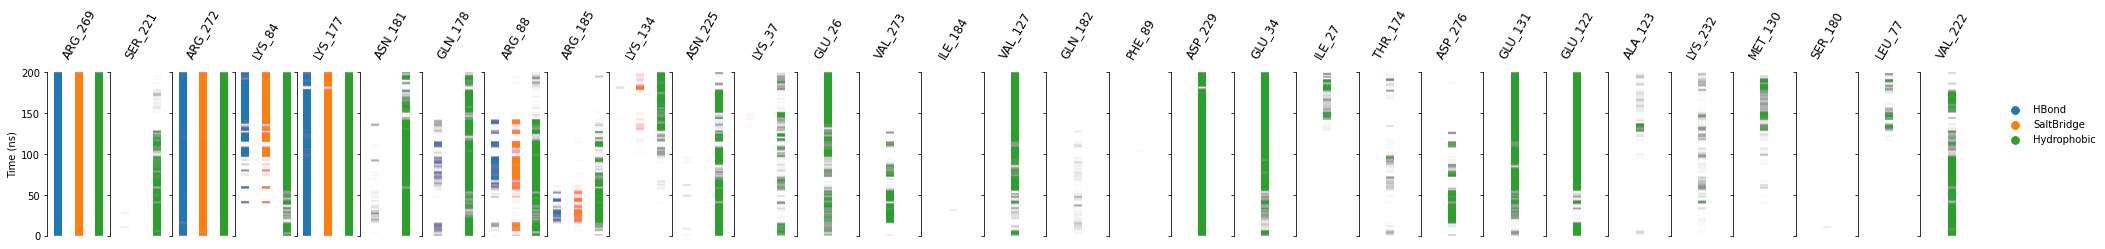

In [19]:

fig = df_catplot_short(df_cat)
fig

In [22]:
fig.savefig('catplot_cit.tiff', dpi=300, transparent=False, facecolor='w', edgecolor='w')

## SLC25A1-ISO

In [26]:
iso_path='/mnt/Storage1/massimo/SLC25A1+ligandi/SLC25A1+isocitrato/cpp_analysis'

In [27]:
dfhb_iso =pd.read_csv(f"{iso_path}/lig_hbonds/ISOhb_series.dat", delim_whitespace=True)
dfhb_iso

,#Frame,ISO_299@O15-LYS_177@NZ-HZ2,ISO_299@O1-GLN_178@NE2-HE22,ISO_299@O8-ARG_272@NH1-HH12,ISO_299@O14-ARG_272@NH2-HH22,ISO_299@O14-ARG_272@NH1-HH12,ISO_299@O15-ARG_272@NH2-HH22,GLU_131@OE2-ISO_299@O12-H18,ISO_299@O9-ARG_272@NH1-HH12,ISO_299@O15-ARG_269@NH1-HH12,...,ISO_299@O3-ASN_181@ND2-HD21,ISO_299@O3-ARG_185@NH2-HH21,ISO_299@O12-ARG_269@NH1-HH12,ISO_299@O14-ASN_225@ND2-HD21,ISO_299@O8-LYS_84@NZ-HZ2,ISO_299@O9-ARG_88@NH1-HH12,ISO_299@O8-LYS_84@NZ-HZ3,ISO_299@O8-LYS_84@NZ-HZ1,ISO_299@O12-LYS_177@NZ-HZ2,ISO_299@O3-ARG_185@NH1-HH11
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,19997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,19998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,19999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
import time

start = time.time()
dfcathb_iso = ctu.df_4catplot(dfhb_iso, 'ISO_299', 'HBond')
end = time.time()
print(end - start)

128.5943522453308


In [29]:
dfsb_iso = ctu.dfseries_sb(f"{iso_path}/lig_saltbridges")

In [30]:
dfsb_iso

,Frame,ISO_299@O3-ARG_88@NH1-HH11,ISO_299@O3-ARG_88@NH1-HH12,ISO_299@O14-LYS_134@NZ-HZ1,ISO_299@O14-LYS_134@NZ-HZ2,ISO_299@O14-LYS_134@NZ-HZ3,ISO_299@O15-LYS_177@NZ-HZ1,ISO_299@O15-LYS_177@NZ-HZ2,ISO_299@O15-LYS_177@NZ-HZ3,ISO_299@O8-ARG_272@NH1-HH11,...,ISO_299@O9-LYS_84@NZ-HZ3,ISO_299@O8-ARG_88@NH2-HH21,ISO_299@O8-ARG_88@NH2-HH22,ISO_299@O9-ARG_88@NH1-HH11,ISO_299@O9-ARG_88@NH1-HH12,ISO_299@O9-ARG_88@NH2-HH21,ISO_299@O9-ARG_88@NH2-HH22,ISO_299@O15-LYS_84@NZ-HZ1,ISO_299@O15-LYS_84@NZ-HZ2,ISO_299@O15-LYS_84@NZ-HZ3
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,19997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,19998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,19999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
import time

start = time.time()
dfcatsb_iso = ctu.df_4catplot(dfsb_iso, 'ISO_299', 'SaltBridge')
end = time.time()
print(end - start)

116.67776846885681


In [33]:
resinfo =  pd.read_csv(f"{iso_path}/lig_hydrophobics/resinfo.dat", delim_whitespace=True, skiprows=26, nrows=299)
resinfo

,#Res,Name,First,Last,Natom,#Orig,#Mol
0,1,ALA,1,12,12,1,1
1,2,PRO,13,26,14,2,1
2,3,ALA,27,36,10,3,1
3,4,SER,37,47,11,4,1
4,5,GLY,48,54,7,5,1
...,...,...,...,...,...,...,...
294,295,TRP,4603,4626,24,295,1
295,296,LYS,4627,4648,22,296,1
296,297,THR,4649,4662,14,297,1
297,298,ASP,4663,4675,13,298,1


In [34]:
dfhp_iso = ctu.dfseries_hp(f"{iso_path}/lig_hydrophobics")

In [35]:
dfhp_iso

,Frame,:299@C2_:84@CE,:299@C2_:88@CZ,:299@C2_:122@CB,:299@C2_:122@CG,:299@C2_:122@CD,:299@C2_:123@CB,:299@C2_:127@CB,:299@C2_:127@CG1,:299@C2_:127@CG2,...,:299@C5_:27@CG1,:299@C5_:122@CG,:299@C10_:27@CG1,:299@C5_:77@CD1,:299@C2_:81@CB,:299@C5_:134@CE,:299@C4_:27@CB,:299@C4_:30@CB,:299@C5_:30@CB,:299@C10_:30@CB
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,19997,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,19998,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,19999,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
import time

start = time.time()
dfcathp_iso = ctu.df_4catplot(dfhp_iso, 'ISO_299', 'Hydrophobic', resinfo=resinfo)
end = time.time()
print(end - start)

377.92865896224976


In [37]:
dfcat_iso = pd.concat([dfcathb_iso, dfcatsb_iso, dfcathp_iso] )


In [38]:
dfcat_iso

,Frame,Residue,value,interaction
19999,17,ARG_269,True,HBond
20000,20,ARG_269,True,HBond
20001,21,ARG_269,True,HBond
20002,22,ARG_269,True,HBond
20003,23,ARG_269,True,HBond
...,...,...,...,...
358040,19994,ASN_225,True,Hydrophobic
358041,19995,ASN_225,True,Hydrophobic
358042,19996,ASN_225,True,Hydrophobic
358043,19997,ASN_225,True,Hydrophobic


In [39]:
def df_catplot_short(df):
    g = sns.catplot(
        data=df, x="interaction", y="Frame", hue="interaction", col="Residue",
        hue_order=["HBond", "SaltBridge", "Hydrophobic"],
        height=3, aspect=0.3, jitter=0, sharex=False, marker="_", s=8, linewidth=.01,
    )
    # g.set_titles("{col_name}")
    g.set_titles("{col_name}")
    # g.set(xticks=[], ylim=(-.5, df_cat_s.Frame.max()+1))
    g.set(xticks=[], ylim=(0, 20000), yticks=np.arange(0,25000,5000))
    g.set_xticklabels([])
    g.set_xlabels("")
    g.set_ylabels("Time (ns)")
    # g.set_yticks(list(range(0,250,50))) # <--- set the ticks first
    g.set_yticklabels([0,50,100,150,200])
    g.fig.subplots_adjust(wspace=0)
    g.add_legend()
    g.despine(bottom=True)
    for ax in g.axes.flat:
    #     ax.invert_yaxis()
        ax.set_title(ax.get_title(), pad=15, rotation=60, ha="center", va="baseline")
    return g

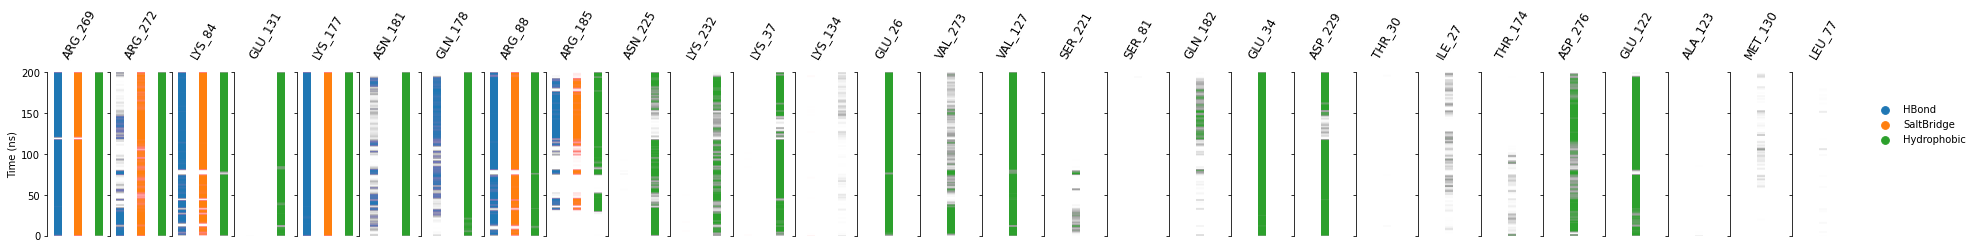

In [40]:
fig = df_catplot_short(dfcat_iso)
fig

In [41]:
fig.savefig('catplot_iso.tiff', dpi=300, transparent=False, facecolor='w', edgecolor='w')

## SLC25A1-MAL

In [42]:
mal_path='/mnt/Storage1/massimo/SLC25A1+ligandi/SLC25A1+malato/cpp_analysis'

In [43]:
dfhb_mal =pd.read_csv(f"{mal_path}/lig_hbonds/MALhb_series.dat", delim_whitespace=True)
dfhb_mal

,#Frame,MAL_299@O1-LYS_37@NZ-HZ3,MAL_299@O3-LYS_134@NZ-HZ3,MAL_299@O10-LYS_177@NZ-HZ2,MAL_299@O1-LYS_232@NZ-HZ1,MAL_299@O10-ARG_269@NH1-HH12,GLU_131@OE2-MAL_299@O7-H13,MAL_299@O1-LYS_37@NZ-HZ1,MAL_299@O7-LYS_177@NZ-HZ2,MAL_299@O9-ARG_269@NH1-HH12,...,MAL_299@O1-ARG_185@NH1-HH12,MAL_299@O1-ARG_185@NH2-HH22,MAL_299@O1-GLN_182@NE2-HE22,MAL_299@O3-ARG_185@NH1-HH12,MAL_299@O3-ARG_185@NH1-HH11,MAL_299@O3-ARG_185@NH2-HH22,MAL_299@O9-ARG_272@NH1-HH12,MAL_299@O9-ARG_272@NH2-HH21,MAL_299@O7-ARG_272@NH1-HH12,MAL_299@O10-ARG_272@NH1-HH12
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,19997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,19998,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,19999,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
import time

start = time.time()
dfcathb_mal = ctu.df_4catplot(dfhb_mal, 'MAL_299', 'HBond')
end = time.time()
print(end - start)

195.63154411315918


In [45]:
dfsb_mal = ctu.dfseries_sb(f"{mal_path}/lig_saltbridges")

In [46]:
dfsb_mal

,Frame,MAL_299@O1-LYS_37@NZ-HZ1,MAL_299@O1-LYS_37@NZ-HZ2,MAL_299@O1-LYS_37@NZ-HZ3,MAL_299@O3-LYS_134@NZ-HZ1,MAL_299@O3-LYS_134@NZ-HZ2,MAL_299@O3-LYS_134@NZ-HZ3,MAL_299@O10-LYS_177@NZ-HZ1,MAL_299@O10-LYS_177@NZ-HZ2,MAL_299@O10-LYS_177@NZ-HZ3,...,MAL_299@O3-ARG_88@NH2-HH22,MAL_299@O1-ARG_185@NH1-HH11,MAL_299@O1-ARG_185@NH1-HH12,MAL_299@O3-ARG_185@NH1-HH11,MAL_299@O3-ARG_185@NH1-HH12,MAL_299@O1-ARG_185@NH2-HH21,MAL_299@O1-ARG_185@NH2-HH22,MAL_299@O3-ARG_185@NH2-HH21,MAL_299@O3-ARG_185@NH2-HH22,MAL_299@O3-ARG_185@NE-HE
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19996,19997,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19997,19998,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
19998,19999,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
import time

start = time.time()
dfcatsb_mal = ctu.df_4catplot(dfsb_mal, 'MAL_299', 'SaltBridge')
end = time.time()
print(end - start)

103.75983333587646


In [48]:
resinfo =  pd.read_csv(f"{mal_path}/lig_hydrophobics/resinfo.dat", delim_whitespace=True, skiprows=23, nrows=299)
resinfo

,#Res,Name,First,Last,Natom,#Orig,#Mol
0,1,ALA,1,12,12,1,1
1,2,PRO,13,26,14,2,1
2,3,ALA,27,36,10,3,1
3,4,SER,37,47,11,4,1
4,5,GLY,48,54,7,5,1
...,...,...,...,...,...,...,...
294,295,TRP,4603,4626,24,295,1
295,296,LYS,4627,4648,22,296,1
296,297,THR,4649,4662,14,297,1
297,298,ASP,4663,4675,13,298,1


In [49]:
dfhp_mal = ctu.dfseries_hp(f"{mal_path}/lig_hydrophobics")

In [50]:
dfhp_mal

,Frame,:299@C2_:34@CB,:299@C2_:34@CG,:299@C2_:34@CD,:299@C2_:37@CB,:299@C2_:37@CG,:299@C2_:37@CD,:299@C2_:37@CE,:299@C2_:38@CB,:299@C2_:38@CG2,...,:299@C5_:88@CZ,:299@C2_:185@CZ,:299@C4_:185@CZ,:299@C5_:185@CZ,:299@C8_:185@CZ,:299@C5_:185@CD,:299@C2_:130@CE,:299@C4_:184@CD,:299@C4_:180@CB,:299@C8_:184@CG1
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
19996,19997,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
19997,19998,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
19998,19999,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [51]:
import time

start = time.time()
dfcathp_mal = ctu.df_4catplot(dfhp_mal, 'MAL_299', 'Hydrophobic', resinfo=resinfo)
end = time.time()
print(end - start)

468.25601291656494


In [52]:
dfcat_mal = pd.concat([dfcathb_mal, dfcatsb_mal, dfcathp_mal] )


In [53]:
dfcat_iso

,Frame,Residue,value,interaction
19999,17,ARG_269,True,HBond
20000,20,ARG_269,True,HBond
20001,21,ARG_269,True,HBond
20002,22,ARG_269,True,HBond
20003,23,ARG_269,True,HBond
...,...,...,...,...
358040,19994,ASN_225,True,Hydrophobic
358041,19995,ASN_225,True,Hydrophobic
358042,19996,ASN_225,True,Hydrophobic
358043,19997,ASN_225,True,Hydrophobic


In [54]:
def df_catplot_short(df):
    g = sns.catplot(
        data=df, x="interaction", y="Frame", hue="interaction", col="Residue",
        hue_order=["HBond", "SaltBridge", "Hydrophobic"],
        height=3, aspect=0.3, jitter=0, sharex=False, marker="_", s=8, linewidth=.01,
    )
    # g.set_titles("{col_name}")
    g.set_titles("{col_name}")
    # g.set(xticks=[], ylim=(-.5, df_cat_s.Frame.max()+1))
    g.set(xticks=[], ylim=(0, 20000), yticks=np.arange(0,25000,5000))
    g.set_xticklabels([])
    g.set_xlabels("")
    g.set_ylabels("Time (ns)")
    # g.set_yticks(list(range(0,250,50))) # <--- set the ticks first
    g.set_yticklabels([0,50,100,150,200])
    g.fig.subplots_adjust(wspace=0)
    g.add_legend()
    g.despine(bottom=True)
    for ax in g.axes.flat:
    #     ax.invert_yaxis()
        ax.set_title(ax.get_title(), pad=15, rotation=60, ha="center", va="baseline")
    return g

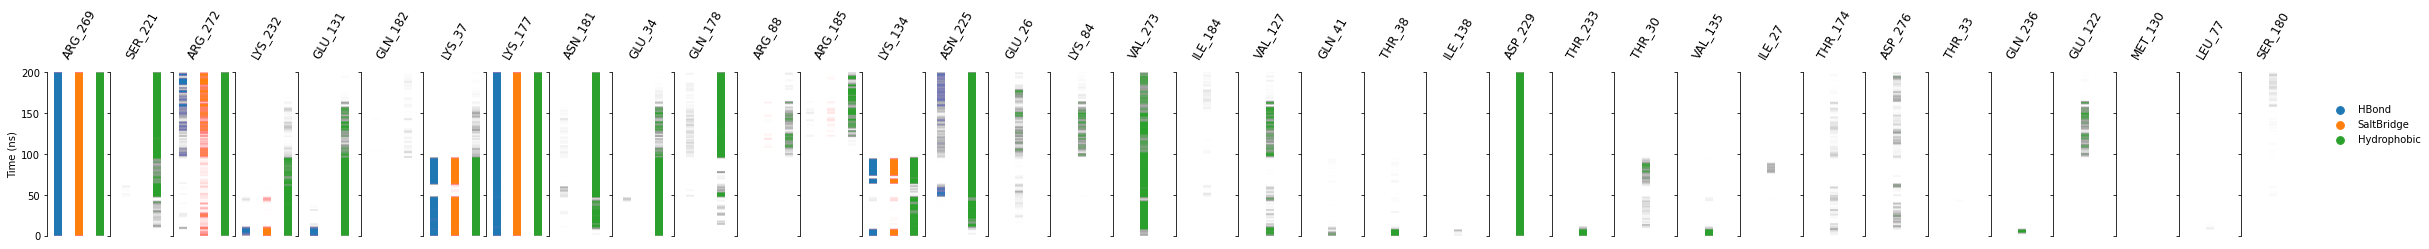

In [55]:
fig = df_catplot_short(dfcat_mal)
fig

In [56]:
fig.savefig('catplot_mal.tiff', dpi=300, transparent=False, facecolor='w', edgecolor='w')